In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## **DATA COLLECTION**

1. Read CSV files
2. Merge 10 transaction files into a single dataset.


In [2]:
loc=pd.read_csv("location.csv")
loc.head(5)

,store_location_id,region,province,city,postal_code,banner,store_num
0,1794,NaN,ONTARIO,LONDON,NaN,dc35b695,1794
1,42,NaN,ONTARIO,TORONTO,NaN,dc35b695,42
2,7218,NaN,ALBERTA,SLAVE LAKE,NaN,6e36648,7218
3,7196,NaN,BRITISH COLUMBIA,VICTORIA,NaN,6e36648,7196
4,7167,NaN,BRITISH COLUMBIA,SURREY,NaN,6e36648,7167


In [5]:
prd=pd.read_csv("product.csv",error_bad_lines=False)
prd.head(5)

<ipython-input-5-7727f092a5be>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  prd=pd.read_csv("product.csv",error_bad_lines=False)


,product_id,sku,upc,item_name,item_description,department,category
0,7652613339,0,7652613339,324168,NaN,651b1068,8312aed6
1,1810063322,0,1810063322,276973,NaN,651b1068,7aaa7a34
2,5274585486,0,5274585486,794396,NaN,c81ba571,54ea8364
3,6978362094,0,6978362094,510386,NaN,b947a4a9,382cf3a
4,6978396053,0,6978396053,120105,NaN,b947a4a9,382cf3a


In [4]:
master_df= pd.DataFrame()

In [6]:
for file in os.listdir('/content'):
  if file.startswith('trans'):
    master_df= master_df.append(pd.read_csv(file))

master_df.to_csv('combined_df.csv', index=False)

<ipython-input-6-47825670ce37>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))
<ipython-input-6-47825670ce37>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))
<ipython-input-6-47825670ce37>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))
<ipython-input-6-47825670ce37>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))
<ipython-input-6-47825670ce37>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [7]:
final=pd.read_csv('combined_df.csv')

<ipython-input-7-13c6bd21ac39>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  final=pd.read_csv('combined_df.csv')


In [8]:
final.head(5)

,store_location_id,product_id,customer_id,trans_dt,sales,units,transaction_id
0,7296,8.537590e+10,-1.000000e+00,2015-06-26,4.97,1.0,1254872965892201506261221
1,7296,8.152600e+10,1.395380e+11,2015-05-01,44.48,1.0,2499072965092201505011441
2,7296,7.710584e+10,1.413338e+11,2015-05-24,16.00,1.0,28995729621768201505241031
3,7296,7.710588e+10,1.412401e+11,2015-07-28,10.66,1.0,738272961182201507281435
4,7296,6.208082e+10,-1.000000e+00,2015-08-21,1.78,1.0,14603729620172201508211458


In [9]:
final.shape

(200000, 7)

## **DATA CLEANING**

1. Identify and address NULL values and errors within the dataset
2. Implement corrective steps to enhance data accuracy.

In [10]:
final.isnull().sum()

store_location_id      0
product_id             0
customer_id            0
trans_dt               0
sales                616
units                593
transaction_id         0
dtype: int64

In [11]:
columns_to_replace = ['sales', 'units']
final[columns_to_replace] = final[columns_to_replace].fillna(0)

In [12]:
print(final)

        store_location_id    product_id   customer_id    trans_dt  sales  \
0                    7296  8.537590e+10 -1.000000e+00  2015-06-26   4.97   
1                    7296  8.152600e+10  1.395380e+11  2015-05-01  44.48   
2                    7296  7.710584e+10  1.413338e+11  2015-05-24  16.00   
3                    7296  7.710588e+10  1.412401e+11  2015-07-28  10.66   
4                    7296  6.208082e+10 -1.000000e+00  2015-08-21   1.78   
...                   ...           ...           ...         ...    ...   
199995               6973  1.000000e+15 -1.000000e+00  10/26/2015  16.96   
199996               6973  1.000000e+15 -1.000000e+00  11/25/2015  10.27   
199997               6973  1.000000e+15 -1.000000e+00  11/12/2015   4.02   
199998               6973  6.202001e+09 -1.000000e+00   8/11/2015   3.54   
199999               6973  5.899700e+09 -1.000000e+00   11/6/2015   4.97   

        units                transaction_id  
0         1.0     12548729658922015062612

In [13]:
final.isnull().sum()

store_location_id    0
product_id           0
customer_id          0
trans_dt             0
sales                0
units                0
transaction_id       0
dtype: int64

## **DATA ANALYSIS**

1. Merge diverse data frames.
2. Uncover and analyze company trends using data insights.



To find the maximum and minimum rows by merging the tables FINAL and LOC, based on their sales.

In [14]:
#Merge COMBINED_DF with LOCATION to get store locations with sales.

merged=loc.merge(final, on=['store_location_id'], suffixes=('_left','_right'))

In [15]:
merged.head(5)

,store_location_id,region,province,city,postal_code,banner,store_num,product_id,customer_id,trans_dt,sales,units,transaction_id
0,7167,NaN,BRITISH COLUMBIA,SURREY,NaN,6e36648,7167,7.940009e+09,-1.0,2016-01-30,5.86,1.0,61171671182201601301038
1,7167,NaN,BRITISH COLUMBIA,SURREY,NaN,6e36648,7167,1.000000e+15,-1.0,2016-01-27,38.82,1.0,24571671182201601271218
2,7167,NaN,BRITISH COLUMBIA,SURREY,NaN,6e36648,7167,1.000000e+15,-1.0,2016-01-26,26.74,1.0,15171671182201601261037
3,7167,NaN,BRITISH COLUMBIA,SURREY,NaN,6e36648,7167,1.000000e+15,-1.0,2016-01-28,41.81,1.0,38671671182201601281326
4,7167,NaN,BRITISH COLUMBIA,SURREY,NaN,6e36648,7167,1.000000e+15,-1.0,2016-01-25,104.11,1.0,9571671182201601251443


In [16]:
#Get MAX value from MERGED which is the Province with the maximum sales.

max_row = merged.loc[merged['sales'].idxmax()]
print("Row with maximum value:\n", max_row)

Row with maximum value:
 store_location_id                         9807
region                                     NaN
province                               ALBERTA
city                                  EDMONTON
postal_code                                NaN
banner                                 6e36648
store_num                                 9807
product_id                   999999999999513.0
customer_id                               -1.0
trans_dt                            2015-04-20
sales                                 43533.23
units                                      2.0
transaction_id       1493798075671201504201802
Name: 19865, dtype: object


In [17]:
#Get MIN value from MERGED which is the Province with the minimum sales.

min_row = merged.loc[merged['sales'].idxmin()]
print("Row with minimum value:\n", min_row)

Row with minimum value:
 store_location_id                         9807
region                                     NaN
province                               ALBERTA
city                                  EDMONTON
postal_code                                NaN
banner                                 6e36648
store_num                                 9807
product_id                   999999999999513.0
customer_id                               -1.0
trans_dt                            2015-05-12
sales                                  -512.68
units                                     -1.0
transaction_id       1577998075671201505121532
Name: 21275, dtype: object




---



To find the top performing provinces and stores based on their total sales.

In [18]:
# Group and aggregate sales by province and store on the basis of sum of sales

province_store_performance = merged.groupby(['province', 'store_location_id'])['sales'].sum()

top_provinces = province_store_performance.groupby('province').sum().sort_values(ascending=False).head(5)
top_stores = province_store_performance.groupby('store_location_id').sum().sort_values(ascending=False).head(5)


In [19]:
top_provinces

province
ONTARIO             2183276.40
ALBERTA             1512522.37
BRITISH COLUMBIA     275536.45
MANITOBA             234435.60
SASKATCHEWAN          54711.16
Name: sales, dtype: float64

In [20]:
top_stores

store_location_id
9807    1030351.77
8142     872304.40
6973     600223.00
1396     467581.28
7296     385435.05
Name: sales, dtype: float64



---



To find and analyze yearly sales trends.

In [21]:
# Convert trans_dt to datetime and extract month and then group by total sum of sales

final['trans_dt'] = pd.to_datetime(final['trans_dt'])
final['month'] = final['trans_dt'].dt.month

monthly_sales = final.groupby('month')['sales'].sum()
monthly_sales

month
1     225892.78
2       9446.67
3      32365.08
4     767716.31
5     390961.83
6     433594.84
7     348517.58
8     551143.66
9     371191.32
10    399373.14
11    354482.10
12    375796.67
Name: sales, dtype: float64

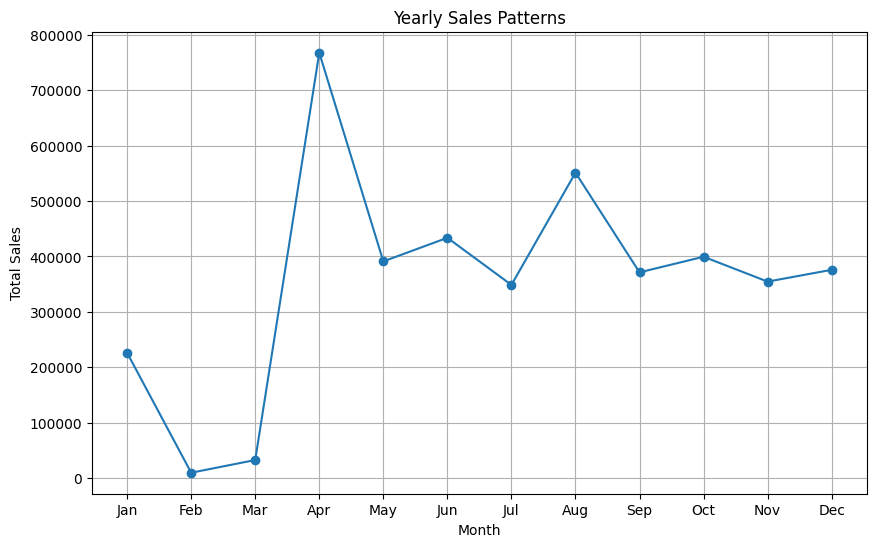

In [39]:
# Create a line plot to visualize yearly sales patterns

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Patterns')
plt.xticks(monthly_sales.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



---



To find and analyze seasonal sales trends.

In [37]:
# Import seaborn library for color palettes
# Define seasons based on months
# Apply the season function to the 'month' column and create a new column 'season'
# Group and aggregate sales by season

import seaborn as sns

final['trans_dt'] = pd.to_datetime(final['trans_dt'])
final['month'] = final['trans_dt'].dt.month

def get_season(month):
    if month in [12, 1, 2]:  # Winter: Dec, Jan, Feb
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: Mar, Apr, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: Jun, Jul, Aug
        return 'Summer'
    else:  # Fall: Sep, Oct, Nov
        return 'Fall'

final['season'] = final['month'].apply(get_season)

seasonal_sales = final.groupby('season')['sales'].sum()
seasonal_sales


season
Fall      1125046.56
Spring    1191043.22
Summer    1333256.08
Winter     611136.12
Name: sales, dtype: float64

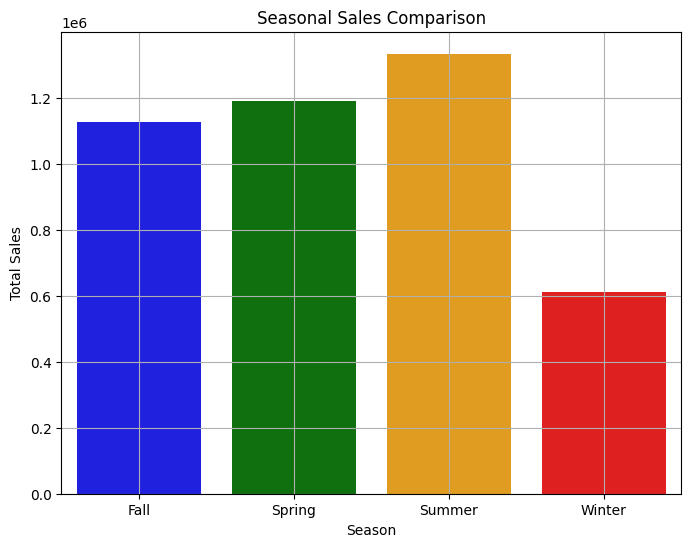

In [38]:
# Define a color palette for each season
# Create a bar plot with the defined colors

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette=colors)
plt.title('Seasonal Sales Comparison')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid()
plt.show()



---



To find the top contributing product category according to total sales.

In [27]:
# Merge COMBINED_DF with PRODUCT to get category information
# Group and aggregate sales by category
# Get the top contributing product categories

combined_with_category = pd.merge(final, prd[['product_id', 'category']], on='product_id', how='left')

category_sales = combined_with_category.groupby('category')['sales'].sum()

top_categories = category_sales.sort_values(ascending=False).head(5)
top_categories

category
fe148072    57546.44
ffcec4a7    48485.95
cef3760b    42988.05
e49d14f1    38208.15
687ed9e3    30999.53
Name: sales, dtype: float64

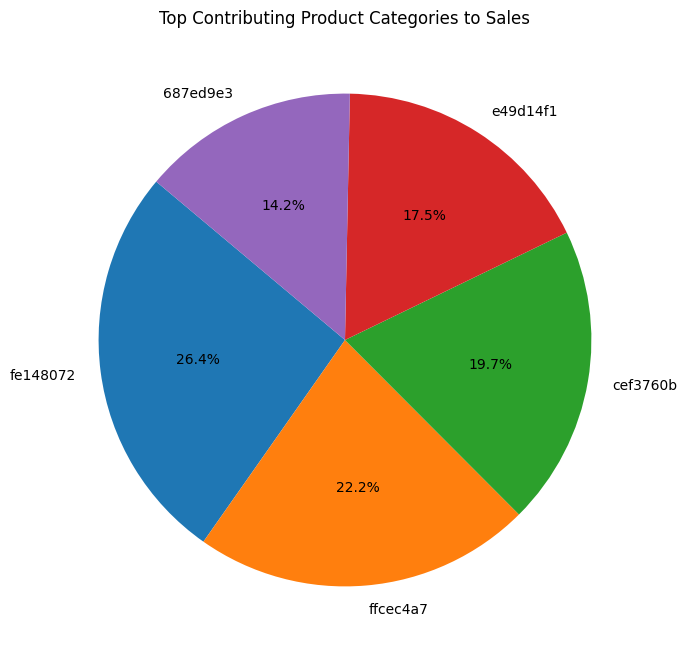

In [24]:
# Create a pie chart

plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Contributing Product Categories to Sales')
plt.show()

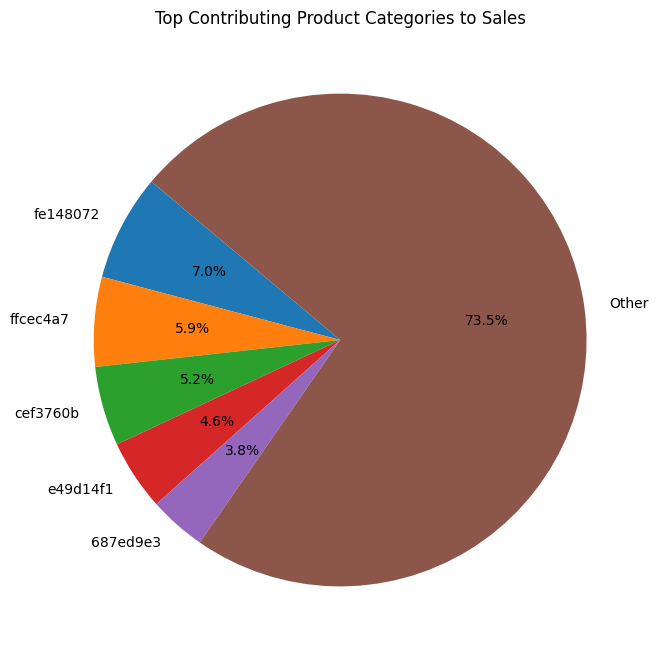

In [28]:
# Calculate the total sales of all other categories
# Create a list of category names including 'Other'
# Create a list of sales values including the 'Other' value

other_categories_sales = category_sales.sum() - top_categories.sum()
category_names = list(top_categories.index) + ['Other']
sales_values = list(top_categories.values) + [other_categories_sales]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=category_names, autopct='%1.1f%%', startangle=140)
plt.title('Top Contributing Product Categories to Sales')
plt.show()




---



To visualize the store performances based on total sales.

Text(0, 0.5, 'Total Sales')

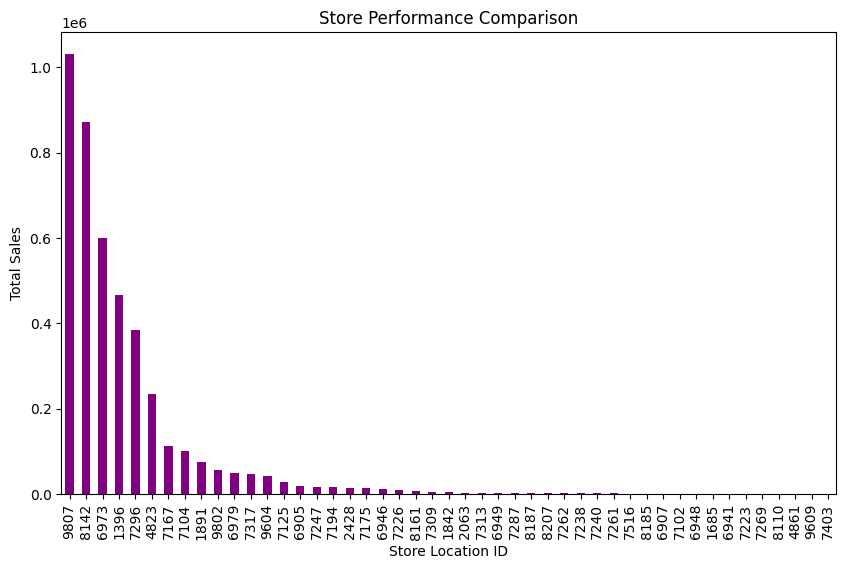

In [25]:
# Calculate total sales for each store
# Visualize store performance comparison

store_performance = final.groupby('store_location_id')['sales'].sum()

store_performance.sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(10, 6), title='Store Performance Comparison')
plt.xlabel('Store Location ID')
plt.ylabel('Total Sales')




---



## **THANK YOU!**